In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X=df.iloc[:,[3,4]].values

## KMeans clustering

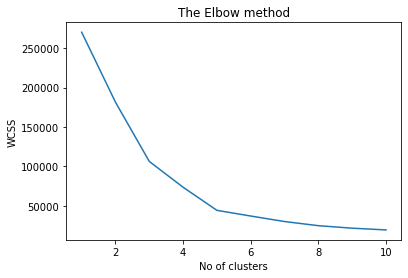

In [4]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.title("The Elbow method")
plt.show()

In [15]:
# Applying Kmeans
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

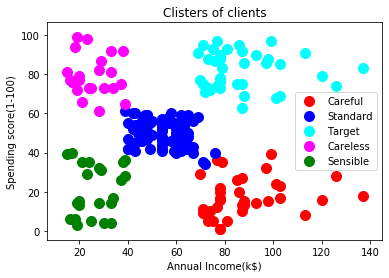

AttributeError: 'KMeans' object has no attribute 'cluster_centres_'

In [21]:
#Visulising the clusters
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='cyan',label='Target')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='magenta',label='Careless')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='green',label='Sensible')
plt.title("Clisters of clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending score(1-100)")
plt.legend()
plt.show()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centres_[:,1],s=300,c='yellow',label='Centroids')

## Hierarchial clustering

Text(0, 0.5, 'Eulcidean ditsnace')

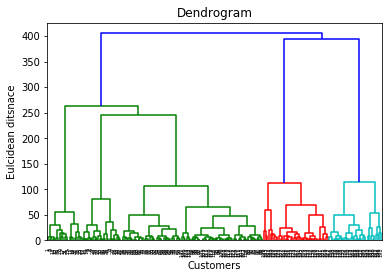

In [23]:
#Using dendrogram finds the optimal no. of clusters
import scipy.cluster.hierarchy as sch
dendro_gram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eulcidean ditsnace")

In [27]:
# Fitting the hierarchial clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

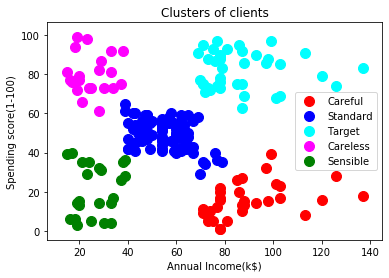

In [29]:
#Visulising the clusters
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='cyan',label='Target')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='magenta',label='Careless')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='green',label='Sensible')
plt.title("Clusters of clients")
plt.xlabel("Annual Income(k$)")
plt.ylabel("Spending score(1-100)")
plt.legend()
plt.show()